<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Initial-Data-Analysis" data-toc-modified-id="Initial-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Descriptive-Statistics:" data-toc-modified-id="Descriptive-Statistics:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Descriptive Statistics:</a></span></li><li><span><a href="#Clean-and-Save-Data-For-Analysis" data-toc-modified-id="Clean-and-Save-Data-For-Analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Clean and Save Data For Analysis</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#The-Pandas_Profiling_Module" data-toc-modified-id="The-Pandas_Profiling_Module-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The Pandas_Profiling_Module</a></span></li><li><span><a href="#Histograms-Of-Clean-Churn-Data" data-toc-modified-id="Histograms-Of-Clean-Churn-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Histograms Of Clean Churn Data</a></span></li><li><span><a href="#Pearson's-Pairwise-Correlation" data-toc-modified-id="Pearson's-Pairwise-Correlation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Pearson's Pairwise Correlation</a></span></li></ul></li><li><span><a href="#Logistic-Regression-Model" data-toc-modified-id="Logistic-Regression-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logistic Regression Model</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Appendices" data-toc-modified-id="Appendices-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendices</a></span><ul class="toc-item"><li><span><a href="#Pandas-Profiling-Module" data-toc-modified-id="Pandas-Profiling-Module-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Pandas Profiling Module</a></span></li></ul></li></ul></div>

# 1_Telecommunications_Churn_Analysis_And_Modeling

To:&nbsp;&nbsp;&nbsp;&nbsp; Magnimind

From: Matt Curcio, matt.curcio.ri@gmail.com

Date: 2022-12-27

Re:&nbsp;&nbsp;&nbsp; Churn Analysis Using 'churn.all2'

---

## Executive Summary

>*Note: This report describes work for the hypothetical telecommunications company, AD&D.*

1. The loss of AD&D customers to competition is a constant problem. The dataset ('churn.all2') obtained on Nov. 5, 2022, from marketing data, shows that 14.1% (approximately 1 out of 7) of AD&D customers leave per quarter. It is hoped that AD&D can reduce its advertising budget of $10 million by 25% per quarter by reducing churn. 

|  Churn Rate | Counts | Percent |
|:------------|-------:|--------:|
|     Churned |    707 |   14.1% |
|    No-Churn |   4293 |   85.9% |
|       Total |   5000 |  100.0% |


2. The purpose of this analysis is determine which factors are important for keeping customers and to model the dataset to better understand if current advertising campaigns are helpful and keep loyal customers. Models were investigated and the top three are:


3. This analysis aims to determine: 

    - What factors/features are important for keeping customers. 
    - What statistical model best describes the dataset so that marketing dollars can be spent wisely and which advertising campaigns are most effective.



4. From the 18 features investigated, five had the lasrgest impact:

    - one



**Conclusions**


1. Customer retention can be achieved with good customer service and products.


|         Model | Accuracy | Recall | Precision |     F2 |
|:--------------|---------:|-------:|----------:|-------:|
|         Logit |      707 |  14.1% |       107 |  11.1% |
| Random Forest |     4293 |  85.9% |       701 |  11.1% |
|       XGBoost |     5000 |  85.9% |       717 |  11.1% |


##  Initial Data Analysis

- This churn data used was provided Yasin Ceran, PhD on November 5, 2020. 

**NOTE 1.** *I use a new report format. I have carried out all this work by experimenting with one Jupyter Notebook at a time. Therefore, I call each notebook individually within this 'master-file'. This emphasises the results and conclusions.*

### Data Preparation

**NOTE 2.** Question marks `?` were found in `churn.all2` therefore use `pd.read_csv(file_name, na_values='?')`. 


In [1]:
# Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
#from statsmodels.tools import add_constant as add_constant
from scipy.stats import norm
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# SKLearn Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


In [2]:
filename = "churn.all2"

df = pd.read_csv(filename, na_values='?') # file=churn.all2 contains '?' instead of Null or Nan.

df.fillna(method='ffill', inplace=True) # Forward fill Nan

df = df.drop('phone_number', axis=1)  # Drop column 'phone_number'.

print(55*'=')
print(f'\nFile "{filename}" has ', df.shape[0], 'Observations &', df.shape[1], 'features.\n')
print(f'Column names are:\n\n', df.columns)

print('\nDataset contains ANY NULL values:', df.isnull().values.any())
print('\nDataset contains ANY NaN values:', df.isna().values.any(), '\n')
print(55 * '=')

df.head(5)


File "churn.all2" has  5000 Observations & 20 features.

Column names are:

 Index(['state', 'account_length', 'area_code', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

Dataset contains ANY NULL values: False

Dataset contains ANY NaN values: False 



,state,account_length,area_code,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.78,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   intl_plan                      5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

### Descriptive Statistics: 

In [4]:
print('\nDescriptive statistics of np.numeric data')
df.describe(include=[np.number]).T


Descriptive statistics of np.numeric data


,count,mean,std,min,25%,50%,75%,max
account_length,5000.0,100.258600,39.694560,1.0,73.000,100.00,127.00,243.00
area_code,5000.0,436.911400,42.209182,408.0,408.000,415.00,415.00,510.00
number_vmail_messages,5000.0,7.755200,13.546393,0.0,0.000,0.00,17.00,52.00
total_day_minutes,5000.0,180.288900,53.894699,0.0,143.700,180.10,216.20,351.50
total_day_calls,5000.0,100.029400,19.831197,0.0,87.000,100.00,113.00,165.00
total_day_charge,5000.0,30.649668,9.162069,0.0,24.430,30.62,36.75,59.76
total_eve_minutes,5000.0,200.636560,50.551309,0.0,166.375,201.00,234.10,363.70
total_eve_calls,5000.0,100.191000,19.826496,0.0,87.000,100.00,114.00,170.00
total_eve_charge,5000.0,17.051844,4.296948,0.0,14.130,17.09,19.90,30.91
total_night_minutes,5000.0,200.391620,50.527789,0.0,166.900,200.40,234.70,395.00


In [5]:
print('\nCounts of object data.')
df.describe(include=[object]).T


Counts of object data.


,count,unique,top,freq
state,5000,51,WV,158
intl_plan,5000,2,no,4527
voice_mail_plan,5000,2,no,3677
churned,5000,2,False.,4293


### Clean and Save Data For Analysis

**NOTE 3.** 
- Based on correlation coefficients (data not shown here) and discussions with the Yasin Ceran, it was decided `state`,`area_code`,`phone_number` will not be used in this analysis.

- Convert features `intl_plan`, `voice_mail_plan` from {yes, no} to integers {0,1}.  

- Convert feature `churned` from {True, False} to integers {0,1}.

In [6]:
file_read = "churn.all2"
file_saved = "clean_churn.csv"

df = pd.read_csv(file_read, na_values='?') # file=churn.all2 contains '?' instead of Null or Nan.

df.fillna(method='ffill', inplace=True)

df.drop(['state', 'phone_number', 'area_code'], axis=1, inplace=True)  # drop a column based on name

df['intl_plan'] = df['intl_plan'].apply(
    lambda x: 0 if x.strip() == 'no' else 1).astype('int8')
df['voice_mail_plan'] = df['voice_mail_plan'].apply(
    lambda x: 0 if x.strip() == 'no' else 1).astype('int8')
df['churned'] = df['churned'].apply(
    lambda x: 0 if x.strip() == 'False.' else 1).astype('int8')

# Change column names for clarity
df.columns = ['Act_Len','Int_Plan','VM_Plan','Num_VM','T_D_Min','T_D_Calls','T_D_Charge','T_E_Min',
              'T_E_Calls','T_E_Charge','T_N_Min','T_N_Calls','T_N_Charge','T_I_Min','T_I_Calls',
              'T_I_Charge','Num_Srv_Calls','Churned']

# Save Cleaned Data
df.to_csv(file_saved)

print(55*'=')
print(f'\nFile "{file_saved}" has ', df.shape[0], 'Observations &', df.shape[1], 'features.\n')
print(f'Column names are:\n\n', df.columns)

print('\nDataset contains ANY NULL values:', df.isnull().values.any())
print('\nDataset contains ANY NaN values:', df.isna().values.any(), '\n')
print(55 * '=')


File "clean_churn.csv" has  5000 Observations & 18 features.

Column names are:

 Index(['Act_Len', 'Int_Plan', 'VM_Plan', 'Num_VM', 'T_D_Min', 'T_D_Calls',
       'T_D_Charge', 'T_E_Min', 'T_E_Calls', 'T_E_Charge', 'T_N_Min',
       'T_N_Calls', 'T_N_Charge', 'T_I_Min', 'T_I_Calls', 'T_I_Charge',
       'Num_Srv_Calls', 'Churned'],
      dtype='object')

Dataset contains ANY NULL values: False

Dataset contains ANY NaN values: False 



## Exploratory Data Analysis

### The Pandas_Profiling_Module

**https://pypi.org/project/pandas-profiling/**
        
The Pandas Profiling Module is very easy to use and retreive information from. One negative about the module is that it generated >400 pages of PDF data. However, the information rate per page was low. 

The Pandas Profiling Module has some *interactive Interaction diagrams*. **See Appendix 1**

- For example, the *Pandas Profiling Module* **provided 15 Alerts for the raw data "churn.all2"**.


| Alert | Message |
|:------|:--------|
| state has a high cardinality: 51 distinct values | High cardinality |
| phone_number has a high cardinality: 5000 distinct values | High cardinality |
| total_eve_charge has a high cardinality: 1660 distinct values | High cardinality |
| number_vmail_messages is highly overall correlated with voice_mail_plan | High correlation |
| total_day_minutes is highly overall correlated with total_day_charge | High correlation |
| total_day_charge is highly overall correlated with total_day_minutes | High correlation |
| total_night_minutes is highly overall correlated with total_night_charge | High correlation |
| total_night_charge is highly overall correlated with total_night_minutes | High correlation |
| total_intl_minutes is highly overall correlated with total_intl_charge | High correlation |
| total_intl_charge is highly overall correlated with total_intl_minutes | High correlation |
| voice_mail_plan is highly overall correlated with number_vmail_messages | High correlation |
| phone_number is uniformly distributed | Uniform |
| phone_number has unique values | Unique |
| number_vmail_messages has 3678 (73.6%) zeros | Zeros |
| number_customer_service_calls has 1023 (20.5%) zeros | Zeros |


**NOTE 5.** See Appdendix for more information:

### Histograms Of Clean Churn Data

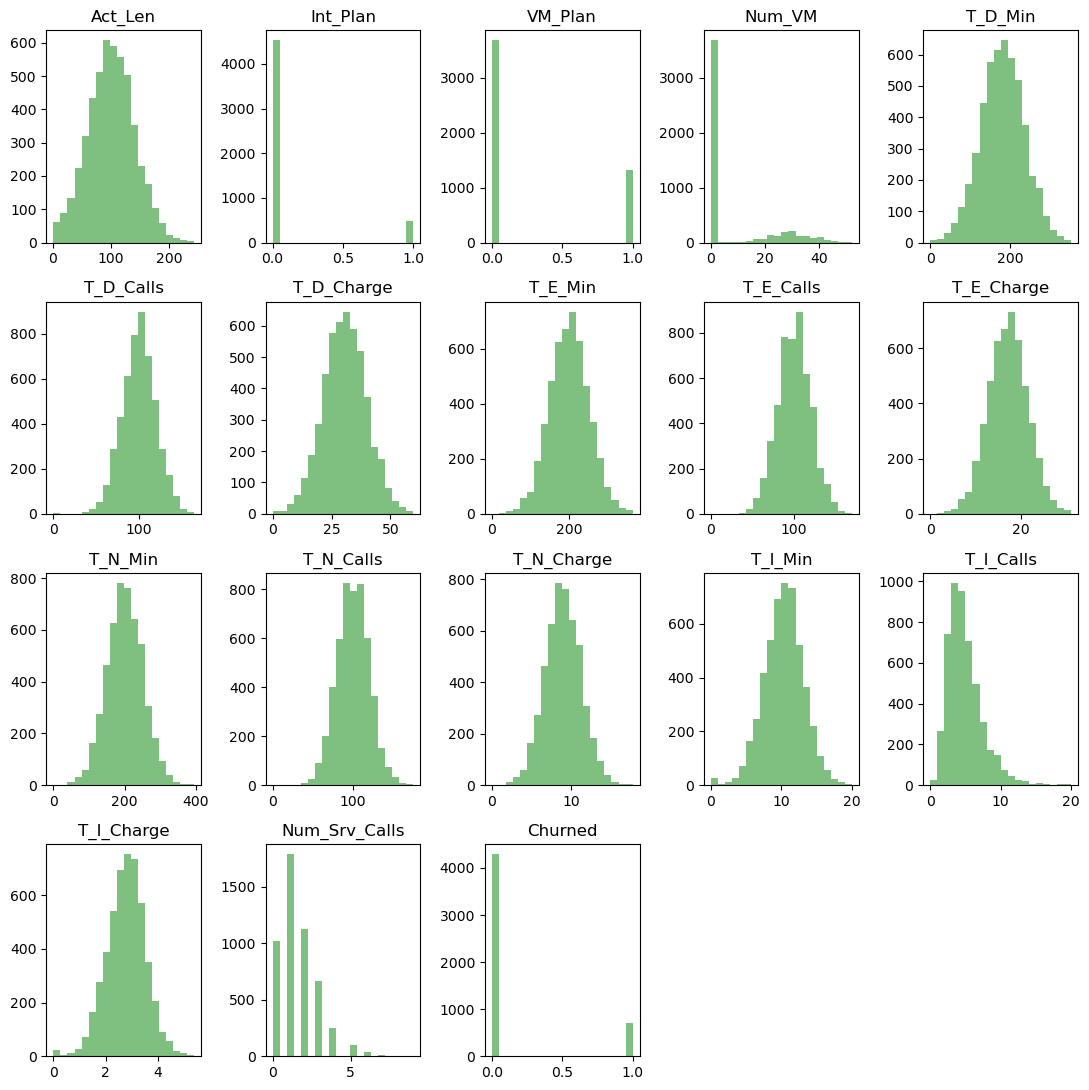

In [8]:
%run 2_Histograms_Of_Clean_Churn_Data.ipynb

### Pearson's Pairwise Correlation

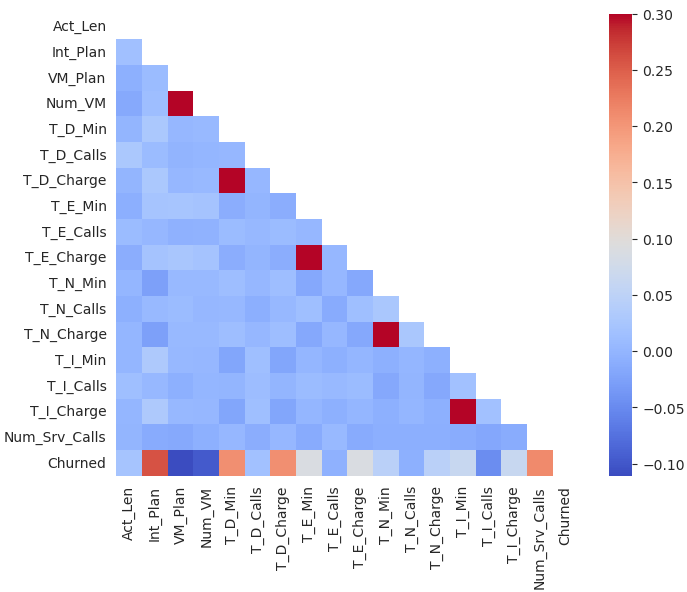

In [10]:
%run 3_Pearson_s_Pairwise_Correlation.ipynb

**NOTE 4.**
    
- With respect to **'Churned': Int_Plan, VM_Plan, T_D_Min, & Num_Srv_Calls have the highest correlations**.


- The five strongly red correlation coefficients near the hypotenuse are collinear variables.

  - 'VM_Plan':'Num_VM'
  - 'T_D_Minutes':'T_D_Charge'
  - 'T_E_Min':'T_E_Charge'
  - 'T_N_Min':'T_N_Charge'
  - 'T_I_Min':'T_I_Charge'
  
  
- Consider removing All Total Charges:
    

## Logistic Regression Model


Best hyperparameters: {'C': 142.51026703029964, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

Accuracy: 0.8656

Determined grid search in 187.3048 seconds.
[[1038   37]
 [ 143   32]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1075
           1       0.46      0.18      0.26       175

    accuracy                           0.86      1250
   macro avg       0.67      0.57      0.59      1250
weighted avg       0.82      0.86      0.83      1250


Run time 1.0946 seconds.


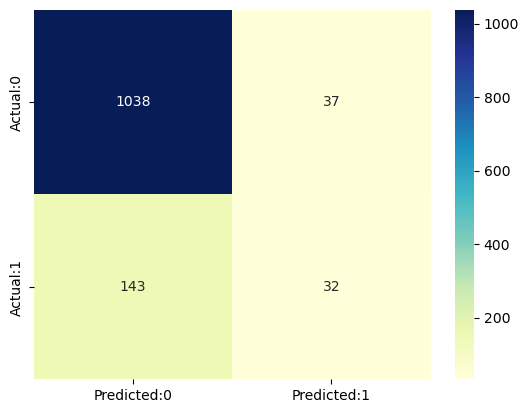

In [2]:
%run 6_Logistic_Regression_Grid_Search.ipynb

## KNN

In [ ]:
x = df.drop('Churned', axis=1)
y = df['Churned']


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100)

scaler = MinMaxScaler()
knn = KNeighborsClassifier()

sx_train = scaler.fit_transform(x_train, y_train)
sx_test = scaler.fit_transform(x_test, y_test)

knn.fit(sx_train, y_train)
knn.score(sx_test, y_test)

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'knn__n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(pipe, param_grid)
grid.fit(x_train, y_train)
grid.score(x_test, y_test)

## Appendices

### Pandas Profiling Module

In [ ]:
%run Appendix_1_EDA_Using_Pandas_Profiling_Module.ipynb